In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('social_network_ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.drop(columns = ['User ID' , 'Gender'])

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns 

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

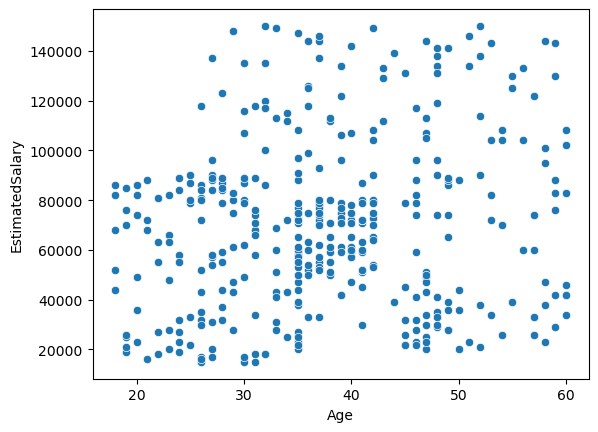

In [7]:
sns.scatterplot(x = df.iloc[:,0],y= df.iloc[:,1] )

In [8]:
X = df[['Age', 'EstimatedSalary']] 
y = df['Purchased'] 

In [9]:
X.shape

(400, 2)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [11]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state=2)

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential 
from tensorflow.keras.layers import Dense 


In [33]:
model = Sequential()
model.add(Dense(128, activation = 'relu' , input_dim=2))
model.add(Dense(1 , activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics = ['accuracy'] )

In [35]:
history = model.fit(X_train_scaled , y_train , validation_data=(X_test_scaled , y_test) , epochs = 100)

Epoch 1/100
10/10 [==============================] - 2s 69ms/step - loss: 0.7252 - accuracy: 0.5219 - val_loss: 0.6929 - val_accuracy: 0.5750
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 0.6630 - accuracy: 0.6687 - val_loss: 0.6303 - val_accuracy: 0.7125
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6112 - accuracy: 0.7469 - val_loss: 0.5783 - val_accuracy: 0.7375
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.5662 - accuracy: 0.7812 - val_loss: 0.5341 - val_accuracy: 0.7625
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.5266 - accuracy: 0.8000 - val_loss: 0.4965 - val_accuracy: 0.7625
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4935 - accuracy: 0.8094 - val_loss: 0.4639 - val_accuracy: 0.7750
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4631 - accuracy: 0.8156 - val_loss: 0.4373 - val_accuracy: 0.7875
Epoch 

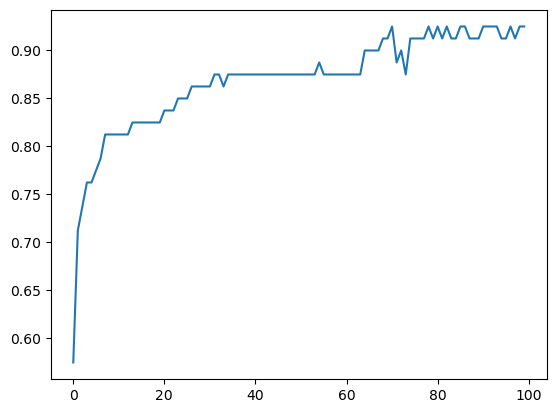

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])